#### Importing Libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\38762\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\38762\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Importing Data

In [264]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(axis = 1, how = 'any', inplace = True) # remove columns with missing valuesss
df.columns = ['label', 'message'] # rename the columns
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Exploratory Data Analysis

In [265]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [266]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [267]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

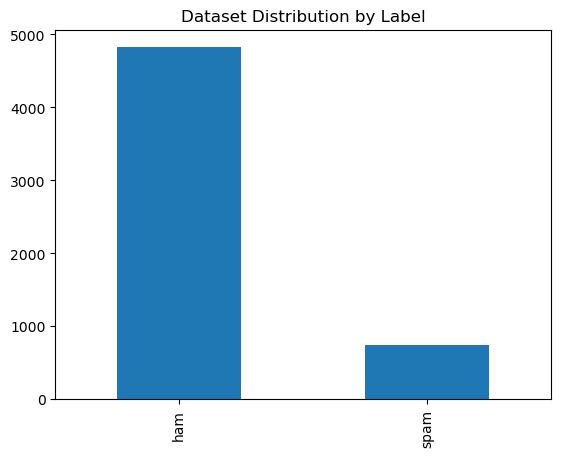

In [268]:
df['label'].value_counts().plot.bar(title ='Dataset Distribution by Label');

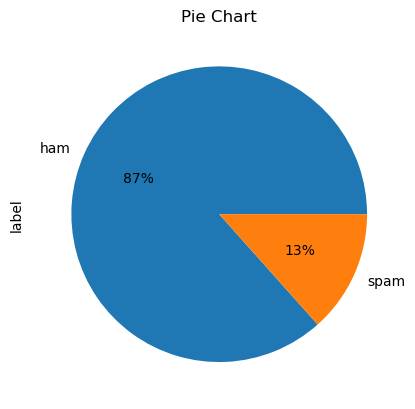

In [269]:
df['label'].value_counts().plot.pie(title = 'Pie Chart', autopct = '%1.0f%%');

In [270]:
df['boolean'] = df['label'].map({'ham':0, 'spam':1}) # Adding a column with boolean values

In [271]:
df['no_of_chars'] = df['message'].apply(len) # Number of characters contained in a message
df['no_of_words'] = df.apply(lambda row: nltk.word_tokenize(row['message']), axis=1).apply(len)
df['no_of_sents'] = df.apply(lambda row: nltk.sent_tokenize(row['message']), axis=1).apply(len)
df.head()

,label,message,boolean,no_of_chars,no_of_words,no_of_sents
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


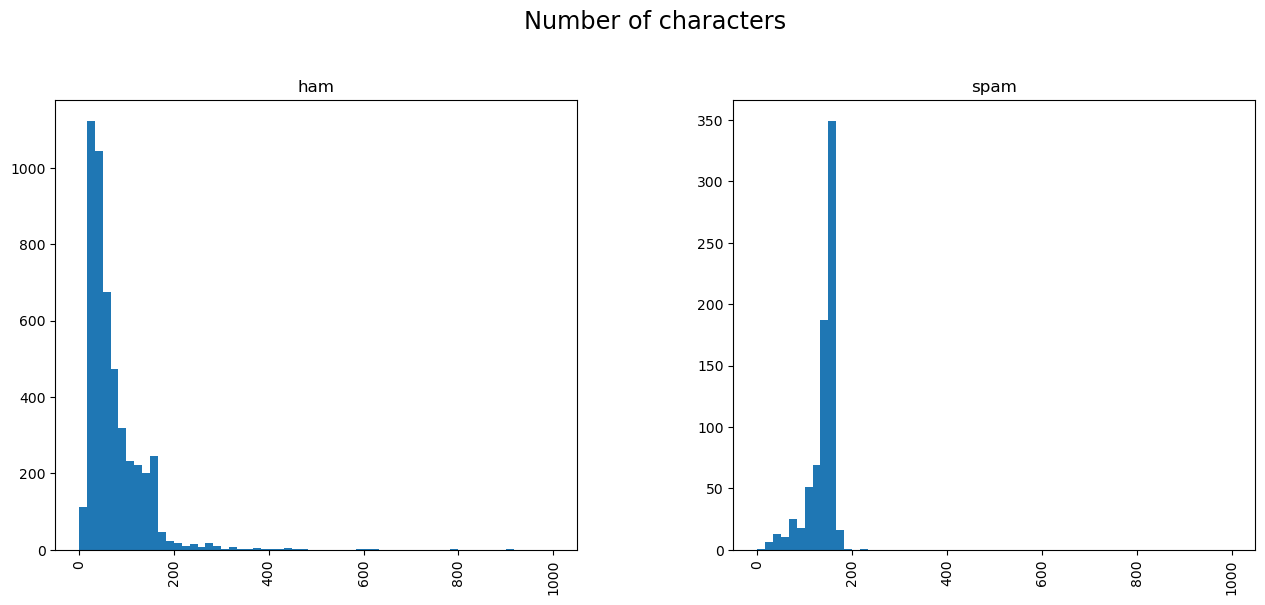

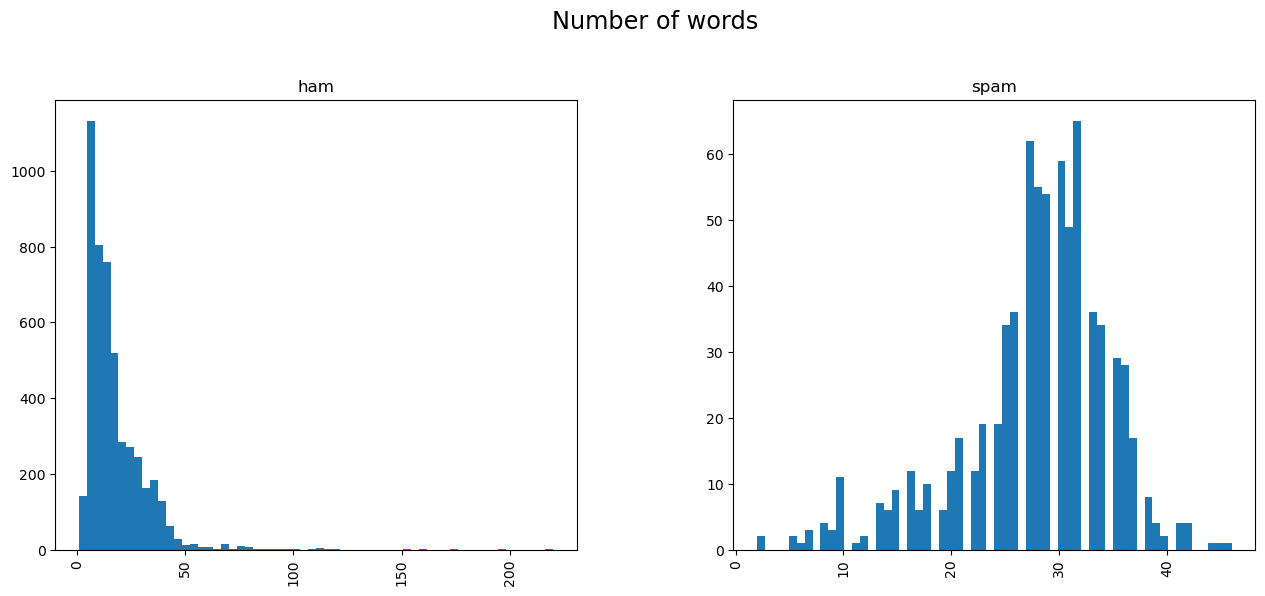

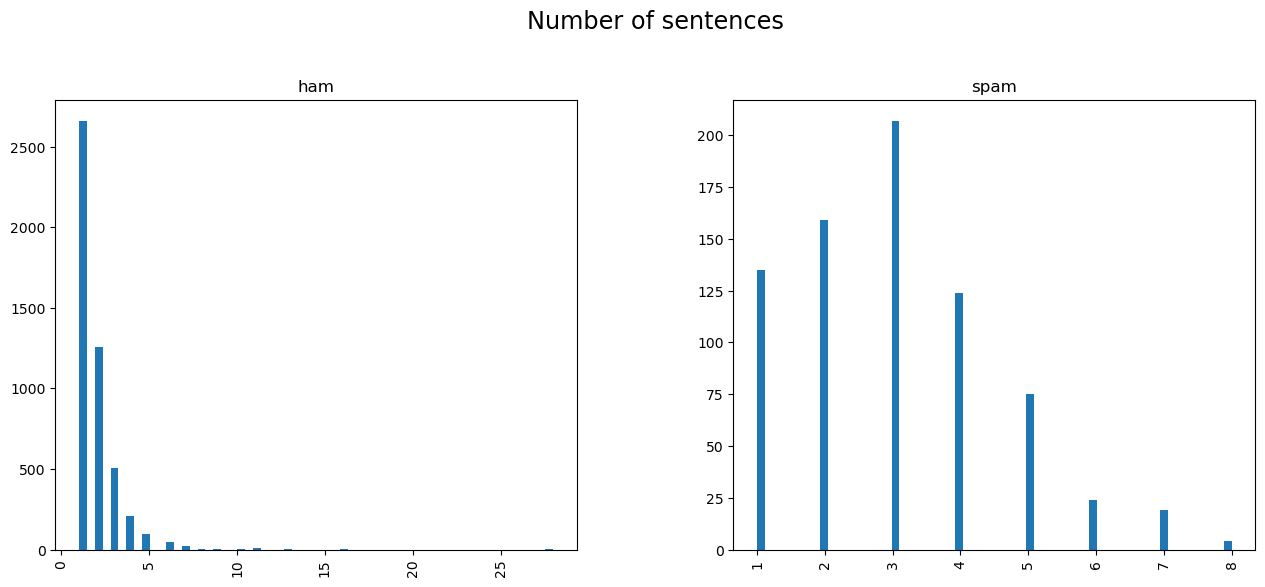

In [272]:
df.hist(column='no_of_chars', by='label', bins=60, figsize=(15,6), range = [0, 1000]);
plt.suptitle('Number of characters', x=0.5, y=1.05, ha='center', fontsize='xx-large')
df.hist(column='no_of_words', by='label', bins=60, figsize=(15,6));
plt.suptitle('Number of words', x=0.5, y=1.05, ha='center', fontsize='xx-large')
df.hist(column='no_of_sents', by='label', bins=60, figsize=(15,6));
plt.suptitle('Number of sentences', x=0.5, y=1.05, ha='center', fontsize='xx-large');

<Figure size 1200x800 with 0 Axes>

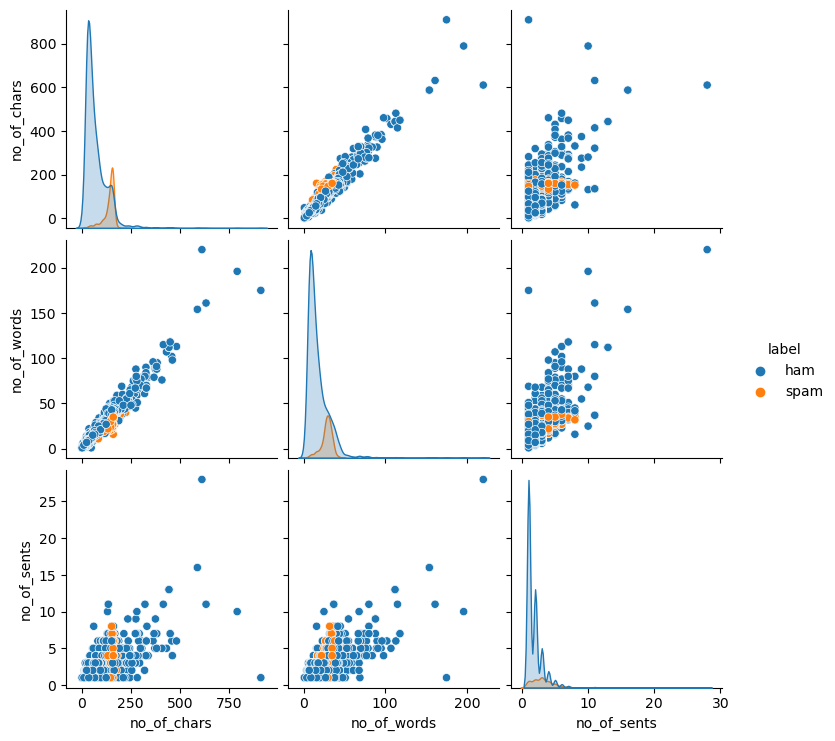

In [273]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df.drop('boolean', axis = 'columns'), hue="label")
plt.show(fg)

#### Removing Outliers

<Figure size 1200x800 with 0 Axes>

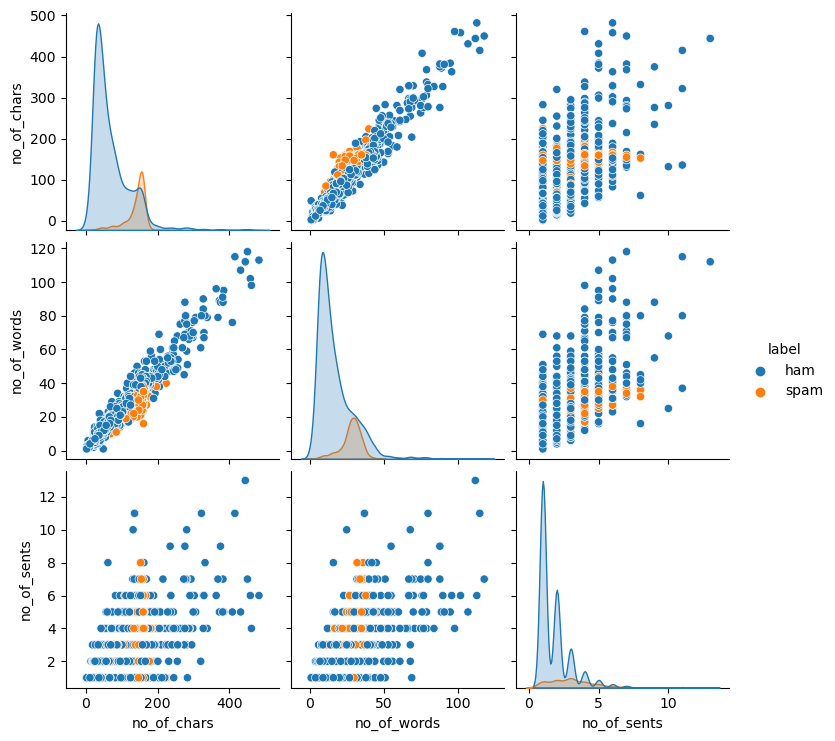

In [274]:
df = df[df["no_of_chars"] < 500]
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=df.drop('boolean', axis = 'columns'), hue="label")
plt.show(fg)

#### Preprocessing

In [275]:
# Remove punctuations and non-letters

def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words
df['clean_msg'] = df.message.apply(process_text)
df.head()

,label,message,boolean,no_of_chars,no_of_words,no_of_sents,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,"[Nah, dont, think, goes, usf, lives, around, t..."


#### Most Frequent Words

In [276]:
count1 = Counter(" ".join(df[df['label']=='ham']["message"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in ham", 1 : "count"})

count2 = Counter(" ".join(df[df['label']=='spam']["message"]).split()).most_common(30)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

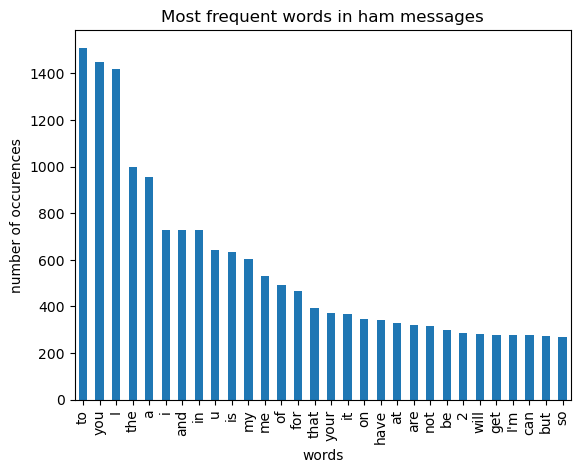

In [277]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in ham"]))
plt.xticks(y_pos, df1["words in ham"])
plt.title('Most frequent words in ham messages')
plt.xlabel('words')
plt.ylabel('number of occurences')
plt.show()

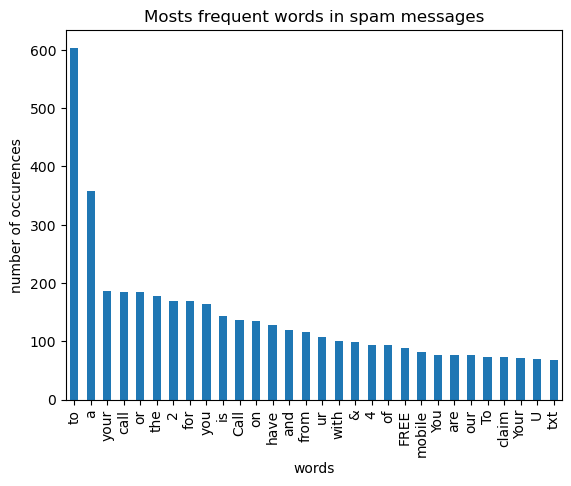

In [278]:
df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Mosts frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number of occurences')
plt.show()

#### Text Vectorization

In [279]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer= text_process).fit_transform(df['clean_msg'])


In [280]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['boolean'], test_size=0.2, random_state=10)

In [281]:
messages_bow.shape


(5566, 86)

In [284]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [286]:
print(classifier.predict(X_train))
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3848
           1       0.79      0.89      0.84       604

    accuracy                           0.95      4452
   macro avg       0.89      0.92      0.90      4452
weighted avg       0.96      0.95      0.95      4452


Confusion Matrix: 
 [[3707  141]
 [  69  535]]

Accuracy:  0.9528301886792453


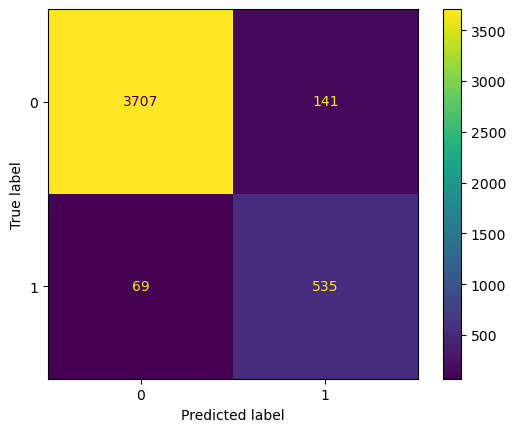

In [292]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_train,pred))
disp.plot()